# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Выводить характеристики вероятностных распределений (мат. ожидание, дисперсия) не требуется.

### Равномерное распределение
Для равномерного распределения с параметрами $a, b$ найдем математическое ожидание и дисперсию:

$\qquad \mathbb{E} = \frac{a+b}{2} \qquad\qquad \mathbb{D} = \frac{(b-a)^2}{12}$

Метод моментов состоит в приравнивании теоретических моментов распределения его выборочным моментам. Первый выборочный момент равен выборочному среднему, а второй выборочный момент вычисляется как выборочная дисперсия. Таким образом, метод моментов для оценки параметров равномерного распределения приводит к системе уравнений:

$\qquad \mathbb{E} = \frac{a+b}{2} = \sum_{i=1}^n X_i$

$\qquad \mathbb{D} = \frac{(b-a)^2}{12} = \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2$

Решам эту систему уравнений относительно параметров $a$ и $b$ и получим:

$a = \overline{X} - \sqrt{\frac{3\sum_{i=1}^n (X_i - \overline{X})^2}{n}}$

$b = \overline{X} + \sqrt{\frac{3\sum_{i=1}^n (X_i - \overline{X})^2}{n}}$

Таким образом, оценка параметров равномерного распределения методом моментов равна

$\widehat{\theta} = \left( \overline{X} - \sqrt{\frac{3\sum_{i=1}^n (X_i - \overline{X})^2}{n}}, \overline{X} + \sqrt{\frac{3\sum_{i=1}^n (X_i - \overline{X})^2}{n}}\right)$

### Распределение Пуассона
Для распределения Пуассона, теоретическими моментами являются математическое ожидание и дисперсия, которые равны параметру $\theta$.
Поэтому приравняв выборочные моменты к теоретическим, получим:

$\begin{align*}
\frac{1}{n}\sum_{i=1}^{n} X_i &= \theta\
\frac{1}{n}\sum_{i=1}^{n} (X_i - \theta)^2 = \theta
\end{align*}$

Решим первое уравнение относительно $\theta$:

$\widehat{\theta}_{MM} = \frac{1}{n}\sum_{i=1}^{n} X_i$

Это оценка методом моментов для параметра $\theta$ в распределении Пуассона.

### Нормальное распределение


Для номального распределения с параметрами $\mathcal{N}(a, \sigma^2)$ найдем математическое ожидание и дисперсию
$\qquad \mathbb{E} = a \qquad\qquad \mathbb{D} = \sigma^2$

$\qquad \mathbb{E} = a = \frac{1}{n}\sum_{i=1}^n X_i$

$\qquad \mathbb{D} = \sigma^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2$

Таким образом, оценка параметра $\theta = (a, \sigma)$ методом моментов для выборки размера $n$ из распределения $\mathcal{N}(a, \sigma^2)$ равна $\hat{\theta} = (\hat{a}, \hat{\sigma}) = (\overline{X}, \sqrt{\frac{1}{n} \sum_{i=1}^n (X_i^2 - \overline{X})^2}$.


---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство, используя известные вам теоретические утверждения.

### Равномерное распределение
Выполним визуальную проверку:

In [18]:
# Генерируем выборки и вычисляем оценки параметров
a_true, b_true = 0.5, 1.5
sample_size = 1000 # размер выборки
samples_count = 50000 # количество выборок
samples = np.random.uniform(low=0.0, high=1.0, size=(samples_count, sample_size))

In [23]:
# Оцениваем параметры методом моментов
a_mme = np.mean(samples, axis=1) - (b_true - a_true) / 2
b_mme = 2 * (np.mean(samples, axis=1) - a_mme)

In [24]:
# Рассчитываем MSE для разных размеров выборки
mse = []
for n in range(1, sample_size + 1):
    a_mme_n = np.mean(samples[:, :n], axis=1) - (b_true - a_true) / 2
    b_mme_n = 2 * (np.mean(samples[:, :n], axis=1) - a_mme_n)
    mse.append(np.mean((a_mme_n - a_true) ** 2) + np.mean((b_mme_n - b_true) ** 2))

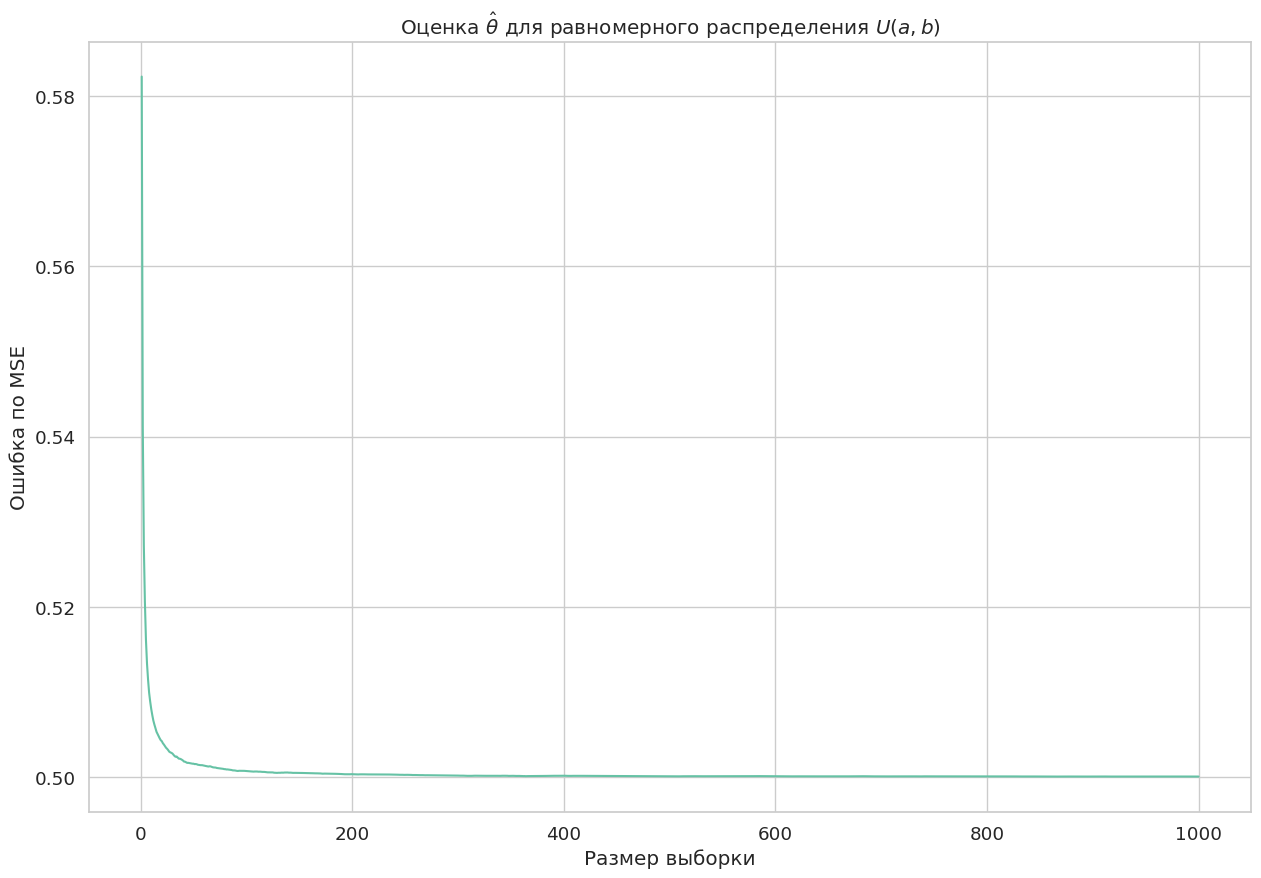

In [32]:
# Строим график MSE от размера выборки
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(1, sample_size + 1), mse)
plt.xlabel("Размер выборки")
plt.ylabel("Ошибка по MSE")
plt.title("Оценка $\\hat{\\theta}$ для равномерного распределения $U(a,b)$")
plt.show()

На графике должно получиться, что MSE уменьшается с ростом размера выборки и стремится к нулю, что говорит о состоятельности оценки методом моментов.

### Пуассоновское распределение

Имея оценку параметра $\theta$ методом моментов $\widehat{\theta}_{MM} = \frac{1}{n}\sum_{i=1}^{n} X_i$ мы можем выразить разницу между оценкой и истинным значением параметра:

$$ \begin{aligned}
|\widehat{\theta} - \theta| &= \left|\frac{1}{n}\sum_{i=1}^{n}X_i - \theta\right| = \left|\frac{1}{n}\sum_{i=1}^{n}(X_i - \theta)\right|.
\end{aligned}$$
Мы знаем, что $\mathbb{D} = \theta$, поэтому мы можем применить закон больших чисел Чебышева:
$$\begin{aligned}
\mathrm{P}\left(\left|\frac{1}{n}\sum_{i=1}^{n}(X_i - \theta)\right| \geqslant \varepsilon\right) &\leqslant \frac{\mathbb{D}[X]}{n\varepsilon^2} = \frac{\theta}{n\varepsilon^2}.
\end{aligned}$$

Мы можем выбрать $\varepsilon$ достаточно малым, чтобы вероятность была сколь угодно малой. Таким образом, оценка методом моментов является сильно состоятельной оценкой параметра $\theta$ для пуассоновского распределения.

**Ответ**: Да, оценка является состоятельной.

### Нормальное распределение

Для доказательства сильной состоятельности оценки параметра нормального распределения покажем, что оценки $\hat{a}, \hat{\sigma}$ сходятся к их истинным значениям $a, \sigma$ по распределению.

Для оценки $\hat{a}$ это следует из ЗБЧ (он утверждает что выборочное среденее $\hat{X}$ сходится по вероятности к математическому ожиданию $a$). А так как по найденной оценке $\hat{a} = \frac{1}{n}\sum_{i=1}^n X_i = \hat{X}$ и из того факта, что их сходимости по вероятности следует сходимость по распределению, мы доказали требуемое.

Для оценки $\hat{\sigma}$ можно воспользоваться состоятельностью выборочной дисперсии, т.е. выборочная дисперсия сходится по вероятности к теоретической дисперсии, а значит сходится по распределению к ней же.

$S^2 = \frac{1}{n} \sum_{i=1}^n (X_i^2 - \overline{X})^2 \rightarrow \sigma^2$

**Ответ**: Да, является состоятельной.

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

**a)**
Рассмотрим следующее выражение:

\begin{align*}
\sum_{i=1}^n\left(X_i-\overline{X}\right)^2 = \sum_{i=1}^n\left(X_i^2-2X_i\overline{X}+\overline{X}^2\right) = \sum_{i=1}^n X_i^2-2\overline{X}\sum_{i=1}^n X_i+n\overline{X}^2 = \sum_{i=1}^n X_i^2-2n\overline{X}^2+n\overline{X}^2 = \sum_{i=1}^n X_i^2-n\overline{X}^2
\end{align*}

Заметим, что $\sum\limits_{i=1}^n X_i^2=n\overline{X^2}$, так как $\overline{X^2}=\frac1n\sum\limits_{i=1}^n X_i^2$. Также заметим, что $\overline{X^2}-\overline{X}^2=S^2$, поскольку $\overline{X^2}$ является вторым выборочным моментом, а $\overline{X}$ является первым выборочным моментом.

Следовательно, 

$\sum_{i=1}^n\left(X_i-\overline{X}\right)^2 = n\overline{X^2} - n\overline{X}^2 = n(\overline{X^2} - \overline{X}^2) = nS^2$

Отсюда следует, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$, что и требовалось доказать.


**b)** 

$\mathbb{E}S^2 = \mathbb{E}(\overline{X^2}-\overline{X}^2)=\mathbb{E}(\overline{X^2}) - \mathbb{E}(\overline{X}^2) = \mathbb{E}(\frac1n\sum\limits_{i=1}^n X_i^2) - (\frac1n\sum\limits_{i=1}^n \mathbb{E} X_i)^2 = \frac1n\sum\limits_{i=1}^n \mathbb{E}(X_i)^2 -(\frac1n\sum\limits_{i=1}^n \mathbb{E} X_i)^2 =\\ = \frac1n\sum\limits_{i=1}^n (\mathbb{E}(X_i)^2 - (\mathbb{E} X_i)^2) = \frac1n\sum\limits_{i=1}^n \mathbb{D} X_i = \frac1n\sum\limits_{i=1}^n \sigma^2 = \sigma^2$

Таким образом, статистика $S^2$ является несмещенной оценкой дисперсии $\sigma^2$.

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** 

Оценка $S^2=\frac{1}{n}\sum\limits_{i=1}^{n}(X_i-\overline{X})^2$ не является несмещенной оценкой для $\sigma^2$, так как $\mathsf{E}(S^2) = \frac{n-1}{n}\sigma^2$. То есть, в среднем мы будем получать оценку, которая меньше истинного значения $\sigma^2$.

Оценка $S^2$ для $\sigma^2$ не является несмещенной, так как ее математическое ожидание равно $\mathbb{E}(S^2) = \sum\limits_{i=1}^{n}\mathbb{E}\overline{(X_i^2)} - \mathbb{E}\overline{X}^2 =  \sum\limits_{i=1}^{n}(\sigma^2+0)-\sigma^2 =  \frac{n-1}{n}\sigma^2 \neq \sigma^2$, то есть среднее значение оценки не равно истинному значению параметра $\sigma^2$.

Однако оценка $\frac{n}{n-1}S^2$ является несмещенной оценкой, то есть ее математическое ожидание равно истинному значению параметра $\sigma^2$: $\mathsf{E}(\frac{n}{n-1}S^2) = \sigma^2$. Это связано с тем, что при использовании коэффициента $\frac{n}{n-1}$ мы корректируем несмещенную оценку выборочной дисперсии $S^2$, чтобы получить несмещенную оценку для истинной дисперсии $\sigma^2$.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture2_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`, отправляя также html-версию графика.

**Решение:**

In [6]:
# Зададим параметры
sigma = 2
n_values = [10, 100, 500]
k = 500

In [7]:
# Функция для оценки методом моментов
def moment_estimate(x):
    return np.mean(x**2)

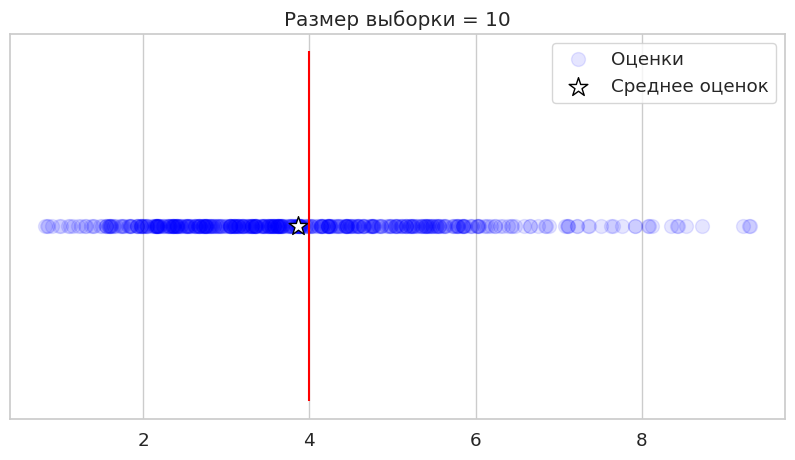

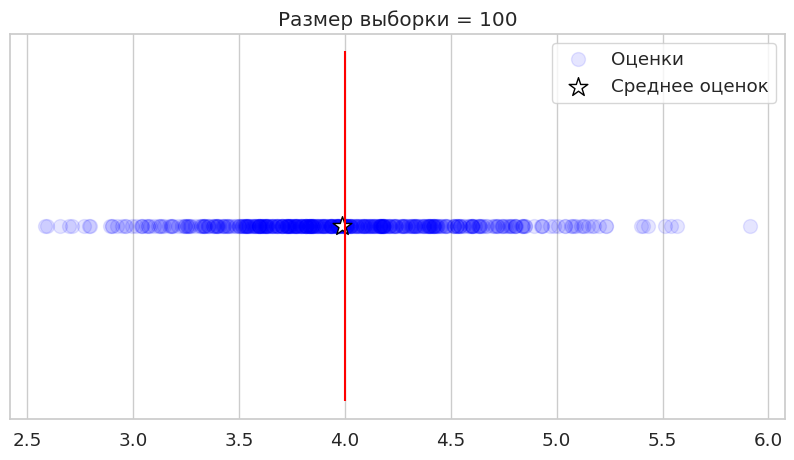

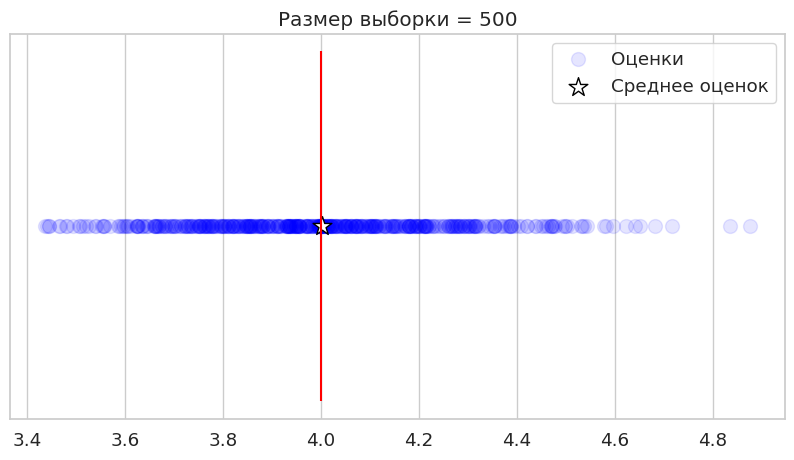

In [8]:
# Построим графики для каждого n
for i, n in enumerate(n_values):
    # Сгенерируем выборки и оценки
    samples = np.random.normal(scale=sigma, size=(k, n))
    estimates = np.apply_along_axis(moment_estimate, 1, samples)
    mean_estimate = np.mean(estimates)
    
    # Построим график
    plt.figure(figsize=(10, 5))
    plt.scatter(estimates, np.zeros(k) + 0.1, alpha=0.1, s=100, color='blue', label='Оценки')
    plt.scatter(mean_estimate, 0.1, marker='*', s=200, color='w', edgecolors='black', label='Среднее оценок')
    plt.vlines(sigma**2, 0, 0.2, color='r')
    plt.title(f'Размер выборки = {n}')
    plt.yticks([])
    plt.legend()
    plt.show()


**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

In [9]:
# Функция для оценки методом максимального правдоподобия
def maximum_likelihood_estimation(sample):
    return np.sqrt(np.pi/2) * np.median(np.abs(sample))

In [15]:
# Генерируем выборки и вычисляем среднее значение оценок
mean_moments = np.array([np.mean([moment_estimate(np.random.normal(0, sigma, n)) for _ in range(k)]) for n in n_values])
mean_likelihoods = np.array([np.mean([maximum_likelihood_estimation(np.random.normal(0, sigma, n)) for _ in range(k)]) for n in n_values])

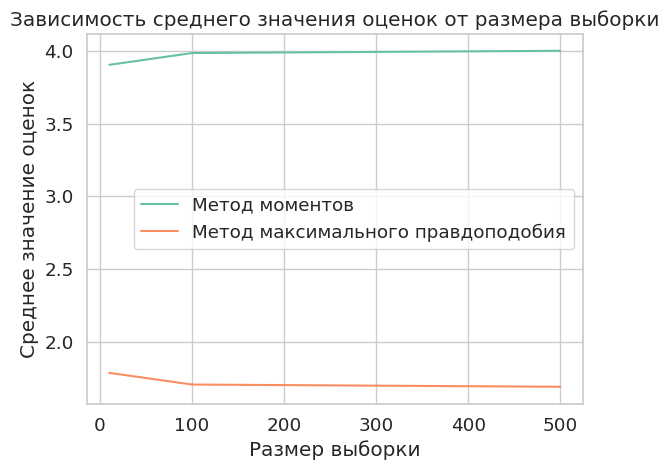

In [16]:
# Строим график
plt.plot(n_values, mean_moments, label='Метод моментов')
plt.plot(n_values, mean_likelihoods, label='Метод максимального правдоподобия')
plt.title('Зависимость среднего значения оценок от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Среднее значение оценок')
plt.legend()
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** 
Свойство несмещенности означает, что математическое ожидание оценки равно истинному значению оцениваемого параметра, то есть $E(\hat{\theta}) = \theta$. Если свойство несмещенности выполняется, то оценка является справедливой, то есть на большом числе выборок ее среднее значение будет близко к истинному значению параметра.

Из графиков зависимости средних оценок от размера выборки можно сделать вывод, что все оценки являются несмещенными, то есть на большом числе выборок их среднее значение стремится к истинному значению параметра. Это подтверждает теоретические результаты, полученные в задачах.

При оценке погрешности в физических экспериментах используют $n-1$ в знаменателе вместо $n$, если оценка вычисляется по выборке из $n$ наблюдений. Это связано с тем, что выборочное среднее, вычисленное по выборке из $n$ наблюдений, уже несмещенная оценка математического ожидания, но если использовать ее для оценки дисперсии, то полученная оценка дисперсии будет смещенной. Использование $n-1$ в знаменателе позволяет получить несмещенную оценку дисперсии.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.